# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [5]:
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

In [6]:
def viz_img(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

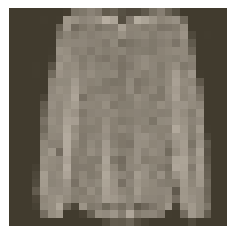

In [7]:
image, label = next(iter(trainloader))
viz_img(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import time

import torch
from torch import nn
from torch import optim

import torch.nn.functional as F

from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
# TODO: Define your network architecture here
# To define a model, we require three things 
# 1) Input size based on input features/resolution of sensors
# 2) Number of hidden units on every number of hidden layers, a decision on both
# 3) Output size which is based on ground truth or unique lables which we are expected to attach finally,based on our probablities.
# 4) Select network components (relu/linear etc)


In [ ]:
#1) In this case image size is 28x28 = 784 pixels = 784 nodes on input layer


In [ ]:
#3) Find output labels count/GT. 
# ###########
# Checked dataset and website, found
#Each training and test example is assigned to one of the following labels:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot
########################
# and hence 10 labels, output layer will have to have 10 nodes

In [ ]:
# from 784 to 10, let us try to approximate it to 5 layers
# 784 to 392 in layer one, 392 to 196 in layer two, 196 to 98 in layer three, 19 in layer four, 19 to 10 in layer five

In [10]:
from collections import OrderedDict

In [12]:
# Network design decision on network components for designed network
fm_input = 784
fm_out= 10
fm_hidden =[392,196,98,19]

##Let us build our new mnist net
fm_model =nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(fm_input, fm_hidden[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(fm_hidden[0], fm_hidden[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(fm_hidden[1], fm_hidden[2])),
                      ('relu3', nn.ReLU()),
                      ('fc4', nn.Linear(fm_hidden[2], fm_hidden[3])),
                      ('relu4', nn.ReLU()),
                      ('logits', nn.Linear(fm_hidden[3], fm_out))]))

                        


In [13]:
fm_model

Sequential(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=98, out_features=19, bias=True)
  (relu4): ReLU()
  (logits): Linear(in_features=19, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [22]:
# TODO: Create the network, define the criterion and optimizer
fm_cmp_crite = nn.CrossEntropyLoss()
fm_optimizer = optim.SGD(fm_model.parameters(), lr=0.01)

In [23]:
# TODO: Train the network here
# First let us do one pass and see what happens
print('Initial weights - ', fm_model.fc1.weight)

fm_images, fm_labels = next(iter(trainloader))
fm_images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
fm_optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
fm_output = fm_model.forward(fm_images)
fm_loss = fm_cmp_crite(fm_output, fm_labels)
fm_loss.backward()
print('Gradient -', fm_model.fc1.weight.grad)
fm_optimizer.step()


Initial weights -  Parameter containing:
tensor([[-3.1469e-02, -2.0396e-02,  1.6349e-02,  ...,  2.0300e-02,
         -2.1620e-02,  3.8493e-05],
        [ 2.9070e-02,  3.2086e-03,  2.7994e-02,  ..., -3.4995e-02,
          1.6078e-02, -1.4290e-02],
        [ 6.9270e-04, -2.4902e-02,  2.5111e-02,  ...,  2.0485e-02,
         -1.1071e-02, -2.1119e-02],
        ...,
        [ 2.9374e-02,  1.8285e-02,  6.9241e-03,  ..., -2.1890e-02,
         -3.3270e-02,  1.1673e-02],
        [ 1.2095e-02,  3.0939e-02,  1.8565e-02,  ...,  1.0396e-02,
          3.9929e-04,  7.5008e-03],
        [ 1.5070e-02, -2.9861e-02,  2.4083e-02,  ...,  4.7940e-03,
          3.2487e-02,  2.7393e-02]])
Gradient - tensor(1.00000e-04 *
       [[ 0.0666,  0.0666,  0.0685,  ..., -0.0559,  0.0674,  0.0666],
        [ 1.8737,  1.8721,  1.8671,  ...,  1.6974,  1.9038,  1.9069],
        [-0.3970, -0.3970, -0.3970,  ..., -0.3369, -0.3970, -0.3970],
        ...,
        [ 1.3658,  1.3658,  1.3658,  ...,  1.4274,  1.3910,  1.3867],
  

In [27]:
print('Updated weights - ', fm_model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[-3.1469e-02, -2.0396e-02,  1.6349e-02,  ...,  2.0300e-02,
         -2.1620e-02,  3.8427e-05],
        [ 2.9068e-02,  3.2067e-03,  2.7992e-02,  ..., -3.4997e-02,
          1.6076e-02, -1.4292e-02],
        [ 6.9310e-04, -2.4902e-02,  2.5111e-02,  ...,  2.0485e-02,
         -1.1071e-02, -2.1119e-02],
        ...,
        [ 2.9373e-02,  1.8284e-02,  6.9227e-03,  ..., -2.1892e-02,
         -3.3272e-02,  1.1671e-02],
        [ 1.2094e-02,  3.0938e-02,  1.8563e-02,  ...,  1.0395e-02,
          3.9832e-04,  7.4996e-03],
        [ 1.5070e-02, -2.9861e-02,  2.4082e-02,  ...,  4.7936e-03,
          3.2487e-02,  2.7393e-02]])


In [ ]:
#Let us do the real training now.. One pass is sucessful as we can see above
fm_cmp_crite = nn.CrossEntropyLoss()
fm_optimizer = optim.SGD(fm_model.parameters(), lr=0.003)

In [56]:
#Initialise
fm_epochs = 4
print_every = 50
steps = 0

for cnt_epochs in range (fm_epochs):
    fm_rt_loss=0
   
    for fm_images, fm_labels in iter(trainloader):
        steps = steps + 1
        ## lets us steam roll images to 784 size vector by beating it down
        fm_images.resize_(fm_images.size()[0],784)
        fm_optimizer.zero_grad()
        
        ## Forward pass -do output and loss 
        fm_output = fm_model.forward(fm_images)
        fm_loss = fm_cmp_crite(fm_output,fm_labels) 
        ## Backward pass - pick up forward loss, propagate back and optimise
        fm_loss.backward()
        fm_optimizer.step()
        
        ##cal total loss for all epochs
        fm_rt_loss = fm_rt_loss+fm_loss.item()
        
        if steps % print_every == 0:
            print("Epoch no : .. ",fm_epochs)
            print ("Loss: ",(fm_rt_loss/print_every))
            fm_rt_loss = 0
        

Epoch no : ..  4
Loss:  2.294188532829285
Epoch no : ..  4
Loss:  2.289400782585144
Epoch no : ..  4
Loss:  2.276886134147644
Epoch no : ..  4
Loss:  2.2648268508911134
Epoch no : ..  4
Loss:  2.2453289365768434
Epoch no : ..  4
Loss:  2.211090521812439
Epoch no : ..  4
Loss:  2.1638818120956422
Epoch no : ..  4
Loss:  2.0847243571281435
Epoch no : ..  4
Loss:  1.983105173110962
Epoch no : ..  4
Loss:  1.8603445935249328
Epoch no : ..  4
Loss:  1.7450697445869445
Epoch no : ..  4
Loss:  1.6144221568107604
Epoch no : ..  4
Loss:  1.4899475646018983
Epoch no : ..  4
Loss:  1.351030158996582
Epoch no : ..  4
Loss:  1.2626980233192444
Epoch no : ..  4
Loss:  1.1791683721542359
Epoch no : ..  4
Loss:  1.1061717617511748
Epoch no : ..  4
Loss:  1.053471703529358
Epoch no : ..  4
Loss:  0.24182895660400391
Epoch no : ..  4
Loss:  0.9269751834869385
Epoch no : ..  4
Loss:  0.8981507635116577
Epoch no : ..  4
Loss:  0.8645882177352905
Epoch no : ..  4
Loss:  0.8206474447250366
Epoch no : ..  4


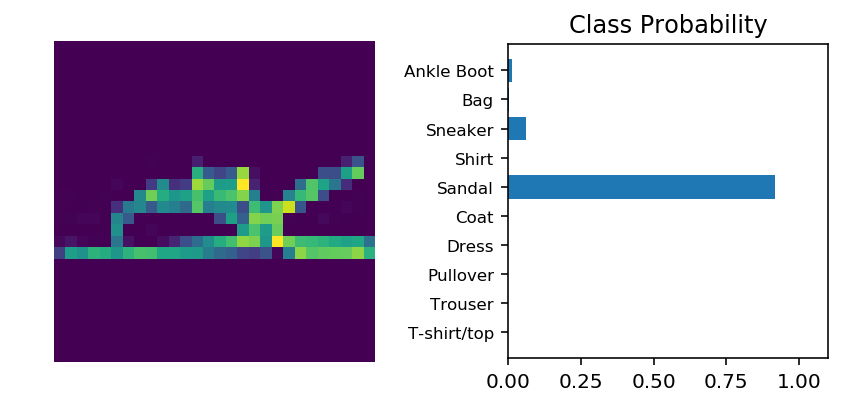

In [58]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = fm_model.forward(img)

ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.

In [59]:
print("Our model: \n\n",fm_model, '\n')
print("The state dict keys: \n\n", fm_model.state_dict().keys())

Our model: 

 Sequential(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=98, out_features=19, bias=True)
  (relu4): ReLU()
  (logits): Linear(in_features=19, out_features=10, bias=True)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias', 'logits.weight', 'logits.bias'])


In [61]:
torch.save(fm_model.state_dict(), 'FashionMNIST_checkpoint1.pth')